In [0]:
##page 6
##page 7
##page 15
##page 24
##page 28
##page 29

In [50]:
##Dowload Voice Samples
##link is valid on 1399/01/02

!wget -O MMS_Audio_Processing_Samples_v1.zip -c 'https://drive.google.com/uc?export=download&id=1Zj7RVF_-xTNeNciZgiGAD-dMsomCdjV9'
!unzip -o MMS_Audio_Processing_Samples_v1.zip
!yes | cp MMS_Audio_Processing_Samples_v1/* .

--2020-03-22 00:18:32--  https://drive.google.com/uc?export=download&id=1Zj7RVF_-xTNeNciZgiGAD-dMsomCdjV9
Resolving drive.google.com (drive.google.com)... 74.125.142.113, 74.125.142.102, 74.125.142.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-8g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8j447ppvdil140b6a1usq5rekoio1b4s/1584836250000/07789214433202185956/*/1Zj7RVF_-xTNeNciZgiGAD-dMsomCdjV9?e=download [following]
--2020-03-22 00:18:32--  https://doc-0g-8g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8j447ppvdil140b6a1usq5rekoio1b4s/1584836250000/07789214433202185956/*/1Zj7RVF_-xTNeNciZgiGAD-dMsomCdjV9?e=download
Resolving doc-0g-8g-docs.googleusercontent.com (doc-0g-8g-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to doc-0g-8g-docs.googleusercontent.com (doc-0g

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app


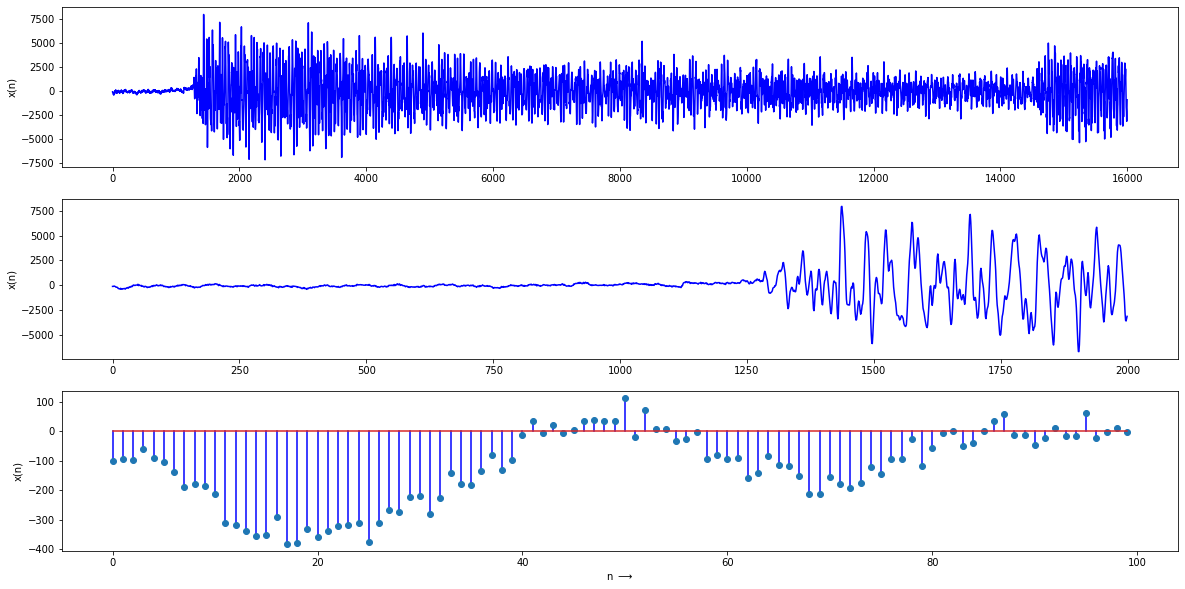

In [31]:
##Page 6
%matplotlib inline
import scipy.io.wavfile
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]


FS, x = scipy.io.wavfile.read('Art.wav')
fig, ax = plt.subplots(nrows=3, ncols=1)
ax[0].plot(range(0,16000),x[range(0,16000)],'blue') 
ax[0].set_ylabel('x(n)')
ax[1].plot(range(0,2000),x[range(0,2000)],'blue')
ax[1].set_ylabel('x(n)')
ax[2].stem(range(0,100),x[range(0,100)],'blue')
ax[2].set_ylabel('x(n)')
ax[2].set_xlabel(r'n $\longrightarrow$')
plt.show()
scipy.io.wavfile.write('exp_1.wav',FS, x)
scipy.io.wavfile.write('exp_1_2.wav',(int)(2*FS), x)
scipy.io.wavfile.write('exp_1_3.wav',(int) (0.5*FS), x)


In [0]:
##source: https://musicinformationretrieval.com/ipython_audio.html
import IPython.display as ipd
ipd.Audio('exp_1.wav') 

In [0]:
ipd.Audio('exp_1_2.wav')

In [0]:
ipd.Audio('exp_1_3.wav') 

In [0]:
##Page 7
%matplotlib inline
import scipy.io.wavfile
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]


FS, x = scipy.io.wavfile.read('Art.wav')
a = 5.0
y = np.zeros((len(x)),dtype=np.int16)
y[range(0,len(x))] = a * x[range(0,len(x))]

scipy.io.wavfile.write('A_Art.wav',FS, y)

In [0]:
##source: https://musicinformationretrieval.com/ipython_audio.html
import IPython.display as ipd
ipd.Audio('Art.wav') 

In [0]:
##Caution: It's much louder than original audio, maybe a little annoying
ipd.Audio('A_Art.wav') 

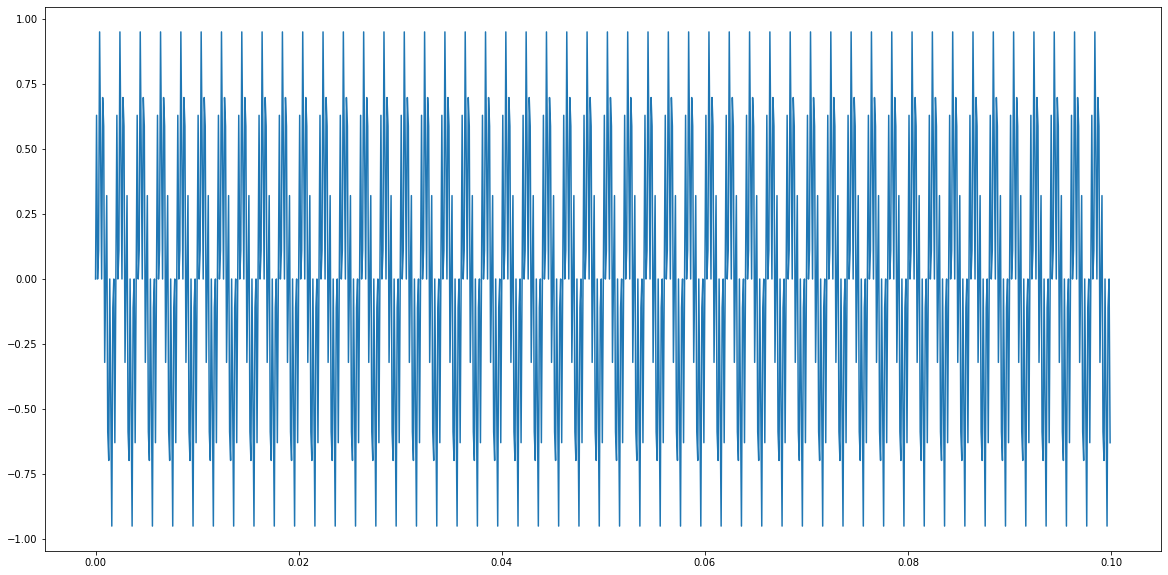

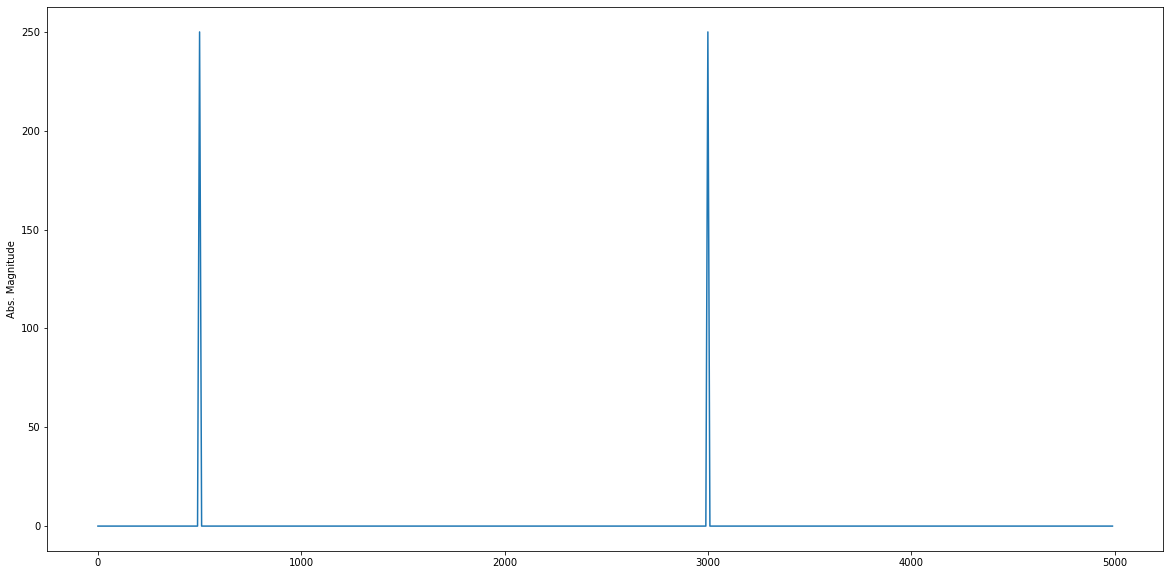

In [5]:
##Page 15
%matplotlib inline
import scipy.io.wavfile
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

fs = 10000
t = np.arange(0.0,0.1, 1.0/fs)
#amplitude = np.iinfo(np.int16).max/2
x = amplitude*(np.sin(2*np.pi*500*t) + np.sin(2*np.pi*3000*t))
x = x.astype(np.float32)
amplitude = 1/2 ## to normalize between -1 to +1 ## https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.write.html
scipy.io.wavfile.write('outsin1.wav',fs, amplitude*x)
plt.plot(t,x)
plt.show()

y = np.fft.fft(x,1000)
y = y[range(0,500)]
m = np.abs(y)

f = np.linspace(start=0, stop=499, num=500) * fs /1000
plt.plot(f,m)
plt.ylabel('Abs. Magnitude')
plt.show()


In [6]:
##source: https://musicinformationretrieval.com/ipython_audio.html
import IPython.display as ipd
ipd.Audio('outsin1.wav') 

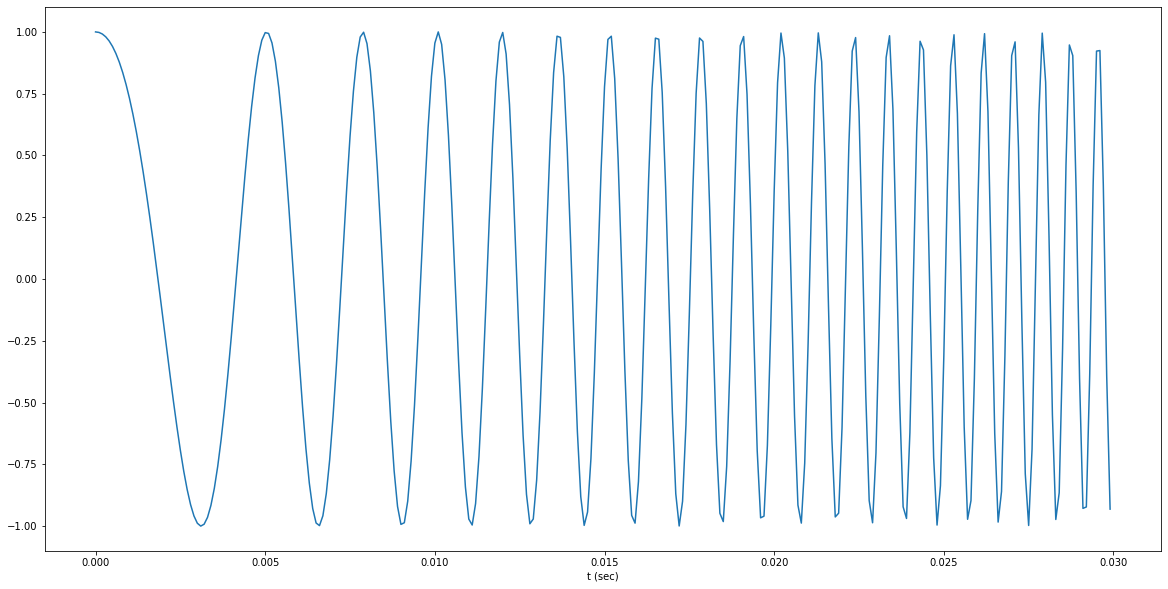

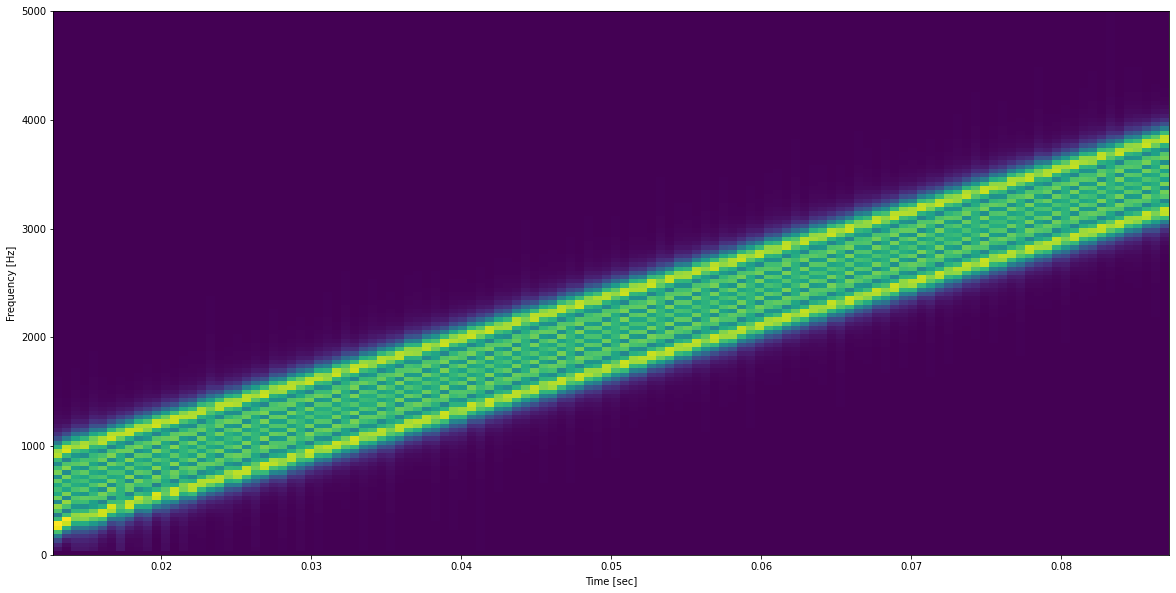

In [15]:
##page 24
%matplotlib inline

import scipy.io.wavfile
from scipy.signal import chirp, spectrogram, windows
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

Fs= 10000
Ts = 1/Fs
t = np.linspace(start=0, stop=999, num=1000) * Ts
y = chirp(t, 100, t[999], 4000)
plt.plot(t[range(0,300)],y[range(0,300)])
plt.xlabel('t (sec)')
plt.show()

scipy.io.wavfile.write('chrip_v1.wav',Fs, y.astype(np.float32))
f, t, Sxx = spectrogram(y, fs=Fs, window=windows.boxcar(256), noverlap=250, nfft=256)##boxcar(256) == np.ones((256))
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [7]:
##source: https://musicinformationretrieval.com/ipython_audio.html
import IPython.display as ipd
ipd.Audio('chrip_v1.wav') 

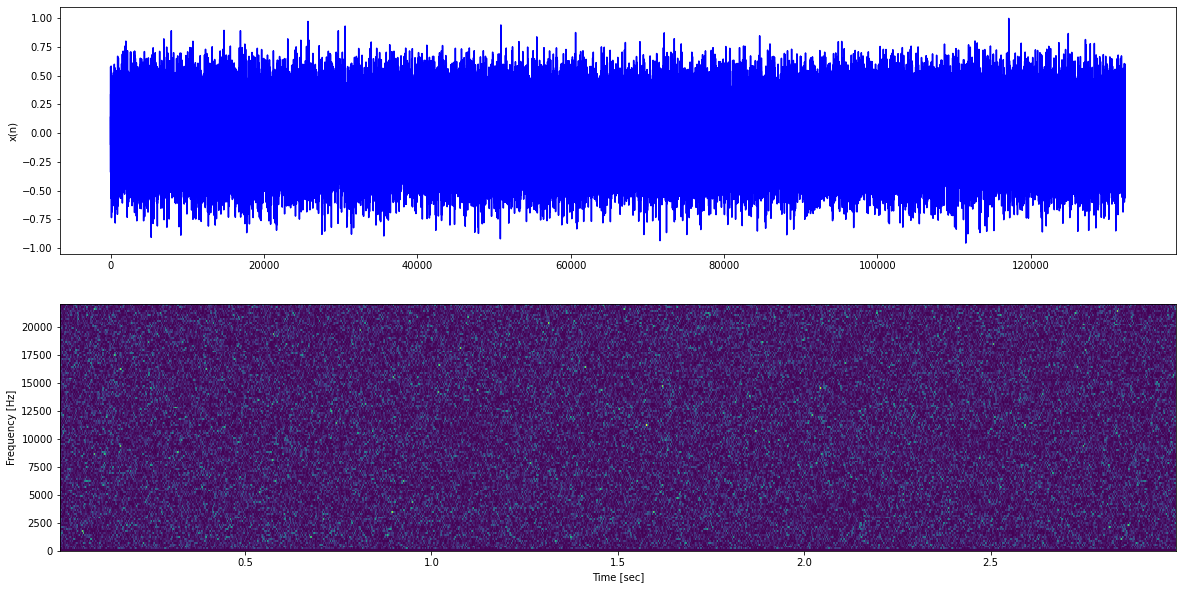

In [18]:
##page 28
%matplotlib inline

import scipy.io.wavfile
from scipy.signal import chirp, spectrogram, windows
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

Fs= 44100
n = np.random.standard_normal(3*Fs)
n = n / np.max(np.abs(n))
fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].plot(n,'blue') 
ax[0].set_ylabel('x(n)')
f, t, Sxx = spectrogram(n, fs=Fs, window=windows.boxcar(256), noverlap=250, nfft=256)##boxcar(256) == np.ones((256))
plt.pcolormesh(t, f, Sxx)
ax[1].pcolormesh(t, f, Sxx)
ax[1].set_ylabel('Frequency [Hz]')
ax[1].set_xlabel('Time [sec]')
plt.show()

scipy.io.wavfile.write('noise_v1.wav',Fs, n.astype(np.float32))


In [19]:
##source: https://musicinformationretrieval.com/ipython_audio.html
import IPython.display as ipd
ipd.Audio('noise_v1.wav') 

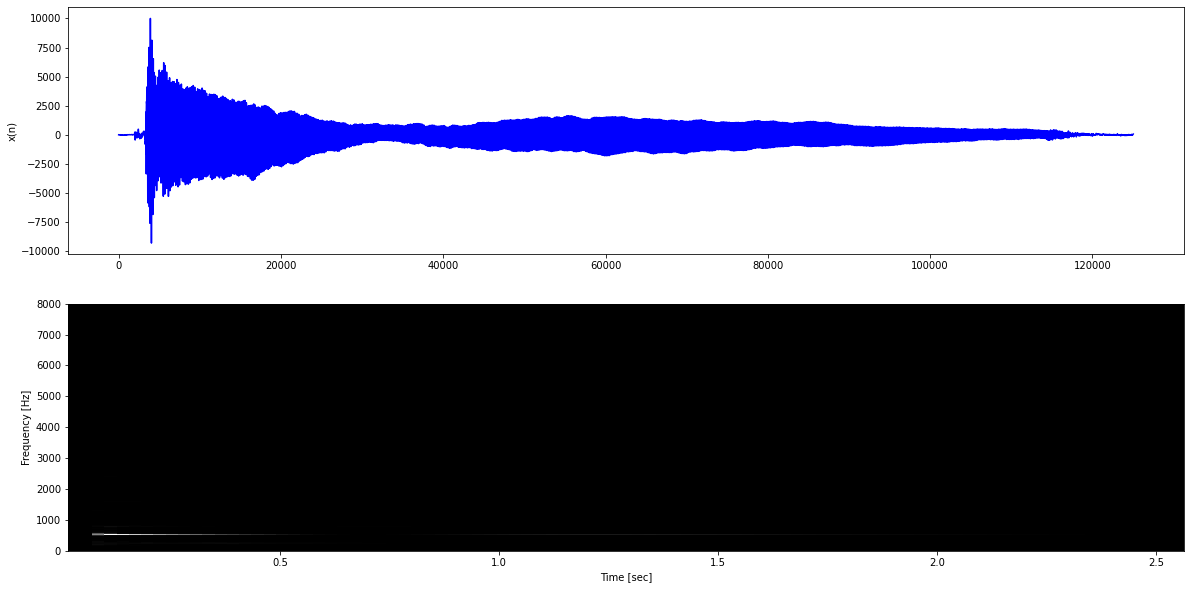

In [49]:
##page 29
%matplotlib inline

import scipy.io.wavfile
from scipy.signal import chirp, spectrogram, windows, resample
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

fs, s = scipy.io.wavfile.read('pia60.wav')
s2 = resample(s,(int)(len(s)/3))##s[range(0,len(s),3)] ## resample((int)len(s)/3)
fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].plot(s,'blue') 
ax[0].set_ylabel('x(n)')
f, t, Sxx = spectrogram(s2, fs=fs/3, window=windows.boxcar(512))## compatibility to matlab code should be double checked
ax[1].pcolormesh(t, f, Sxx,cmap='gray') ##colormap should be normalized
ax[1].set_ylabel('Frequency [Hz]')
ax[1].set_xlabel('Time [sec]')
plt.show()

In [48]:
##source: https://musicinformationretrieval.com/ipython_audio.html
import IPython.display as ipd
ipd.Audio('pia60.wav') 